# Cross Validation
**Cross-validation is a statistical method used to estimate the performance (or accuracy) of machine learning models. It is used to protect against overfitting in a predictive model, particularly in a case where the amount of data may be limited.**

# Types of Cross Validation:
    (1)Holdout method
    (2)K-fold cross-validation
    (3)Stratified k-fold cross-validation
    
## Holdout method: (train-test split)
It is a quite basic and simple approach in which we divide our entire dataset into two parts, training data and testing data. As the name, we train the model on training data and then evaluate on the testing set. In this approach, the data is first shuffled randomly before splitting. 

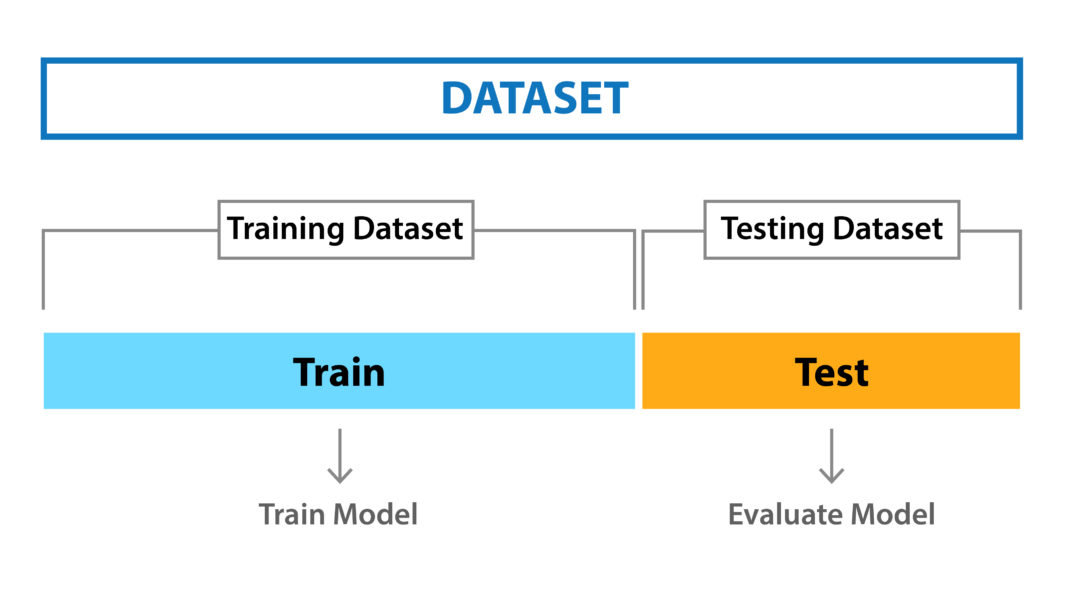

**When our dataset is not too large, there is a high possibility that the testing data may contain some important information that we lose as we do not train the model on the testing set. <br>
The hold-out method is good to use when you have a very large dataset, you’re on a time crunch, or you are starting to build an initial model in your data science project.**

## K-fold cross-validation:
K-fold cross validation is one way to improve the holdout method. This method guarantees that the score of our model does not depend on the way we picked the train and test set. The data set is divided into k number of subsets and the holdout method is repeated k number of times.
### Steps:
    (1)Split the input dataset into K groups
    (2)For each group:
        (i)Take one group as the reserve or test data set.
        (ii)Use remaining groups as the training dataset
        (iii)Fit the model on the training set and evaluate the performance of the model using the test set.
 
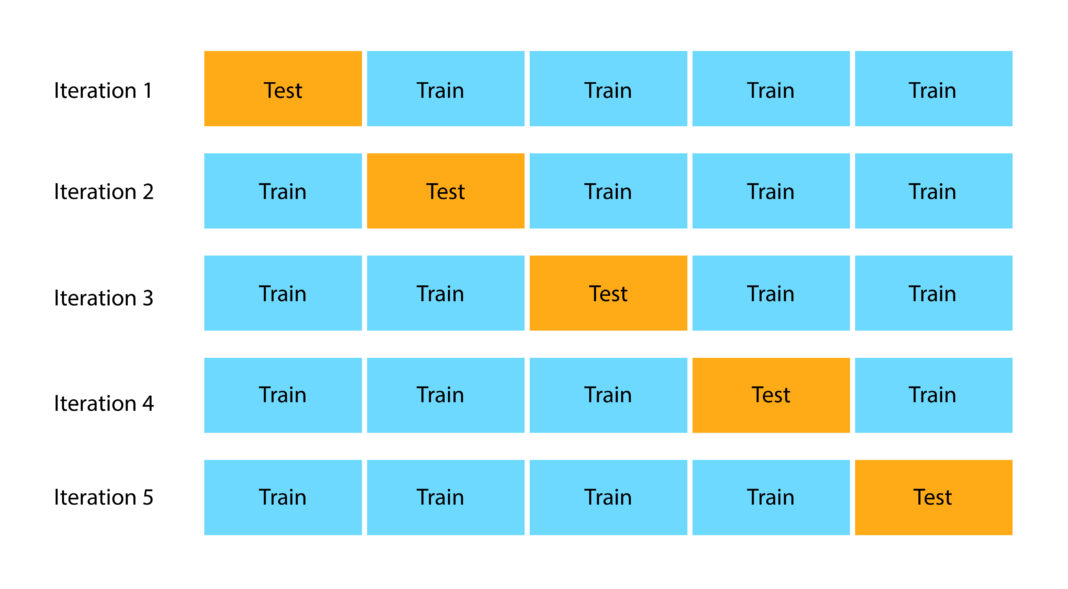

# Stratified k-fold cross-validation
Using K Fold on a classification problem can be tricky. Since we are randomly shuffling the data and then dividing it into folds, chances are we may get highly imbalanced folds which may cause our training to be biased. <br>
For example, let us somehow get a fold that has majority belonging to one class(say positive) and only a few as negative class. This will certainly ruin our training and to avoid this we make stratified folds using stratification. <br>

**It is a process of rearranging the data to ensure that each fold or group is a good representative of the complete dataset.**

# Import Modules

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

# Train-Test Split

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

### Logistic Regression

In [4]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9481481481481482

### SVM

In [5]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.35185185185185186

### Random Forest

In [6]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9629629629629629

# KFold cross validation

In [7]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)                          # 'n-splits' = No. of folds
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [8]:
# example using data [1,2,3,4,5,6,7,8,9]
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


## Using Stratified KFold on digits dataset
## Manual Implementation: (Without using SKLearn cross_val_score function)

In [9]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [10]:
# KFold is a cross-validator that divides the dataset into k folds.
# Stratified is to ensure that each fold of dataset has the same proportion of observations with a given label.

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

# to append accuracy scores for 'n' number of splits
scores_logistic = []
scores_svm = []
scores_rf = []

# To check how accuracy of the model is calculated.
# the following lines of codes can be performed using 'cross_val_score'.
for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [11]:
# each element represents the accuracy score of nth split (total spits - 3)
scores_logistic

[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]

In [12]:
scores_svm

[0.3806343906510851, 0.41068447412353926, 0.5125208681135225]

In [13]:
scores_rf

[0.9315525876460768, 0.9382303839732888, 0.9248747913188647]

## Using SKLearn cross_val_score function

In [14]:
from sklearn.model_selection import cross_val_score

### Logistic Regression 

In [15]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)

array([0.89482471, 0.95325543, 0.90984975])

### SVM

In [16]:
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)

array([0.38063439, 0.41068447, 0.51252087])

### Random Forest

In [17]:
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)

array([0.92821369, 0.94657763, 0.92320534])

### Note: Thus, same accuracy scores are obtained as obtained in manual calculation above.

## Parameter tunning on Random Forest Classifier using Cross Validation

In [18]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

0.865316573556797

In [19]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
np.average(scores2)

0.9398944754810674

In [20]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
np.average(scores3)

0.9454438237119802

In [21]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
np.average(scores4)

0.9376629422718807